## To be used on Time Series without Trend and Seasonality.
## Regression with the current observation and its previous observation.

In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df = pd.read_csv('daily-min-temperatures.csv', header = 0, parse_dates=[0])
data = df

In [3]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
df['N'] = df['Temp'].shift(1)

In [5]:
train_size = int(df.shape[0]-7)
train_size

3643

In [6]:
train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [7]:
train

,Date,Temp,N
0,1981-01-01,20.7,NaN
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
...,...,...,...
3638,1990-12-20,15.4,14.7
3639,1990-12-21,13.1,15.4
3640,1990-12-22,13.2,13.1
3641,1990-12-23,13.9,13.2


In [8]:
test

,Date,Temp,N
3643,1990-12-25,12.9,10.0
3644,1990-12-26,14.6,12.9
3645,1990-12-27,14.0,14.6
3646,1990-12-28,13.6,14.0
3647,1990-12-29,13.5,13.6
3648,1990-12-30,15.7,13.5
3649,1990-12-31,13.0,15.7


In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
mean_squared_error(test['N'],test['Temp'])

3.4228571428571413

# Auto Regression Model

In [11]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [12]:
lag_ = ar_select_order(train['Temp'], maxlag=30)
lag_list = lag_.ar_lags

In [13]:
model = AutoReg(train['Temp'], lags = lag_list).fit()

In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 3649
Model:                    AutoReg(13)   Log Likelihood               -8372.451
Method:               Conditional MLE   S.D. of innovations              2.420
Date:                Sun, 20 Aug 2023   AIC                          16774.902
Time:                        13:40:33   BIC                          16867.882
Sample:                            13   HQIC                         16808.021
                                 3649                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7862      0.143      5.482      0.000       0.505       1.067
y.L1           0.6002      0.017     36.248      0.000       0.568       0.633
y.L2          -0.0829      0.019     -4.292      0.000      -0.121      -0.045
y.L3           0.0552      0.019      2.852      0.004       0.017       0.093
y.L4           0.0448      0.019      2.310      0.021       0.007       0.083
y.L5           0.0478      0.019      2.469      0.014       0.010       0.086
y.L6           0.0335      0.019      1.723      0.085      -0.005       0.072
y.L7           0.0536      0.019      2.756      0.006       0.015       0.092
y.L8           0.0221      0.019      1.135      0.256      -0.016       0.060
y.L9           0.0498      0.019      2.563      0.010       0.012       0.088
y.L10          0.0073      0.019      0.376      0.707      -0.031       0.045
y.L11          0.0176      0.019      0.907      0.365      -0.020       0.056
y.L12          0.0269      0.019      1.391      0.164      -0.011       0.065
y.L13          0.0534      0.017      3.223      0.001       0.021       0.086
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0188           -0.0000j            1.0188           -0.0000
AR.2             1.0623           -0.5777j            1.2092           -0.0793
AR.3             1.0623           +0.5777j            1.2092            0.0793
AR.4             0.7214           -0.9787j            1.2159           -0.1489
AR.5             0.7214           +0.9787j            1.2159            0.1489
AR.6             0.1847           -1.2249j            1.2387           -0.2262
AR.7             0.1847           +1.2249j            1.2387            0.2262
AR.8            -0.4412           -1.2151j            1.2927           -0.3054
AR.9            -0.4412           +1.2151j            1.2927            0.3054
AR.10           -1.2802           -0.3661j            1.3316           -0.4557
AR.11           -1.2802           +0.3661j            1.3316            0.4557
AR.12           -1.0084           -0.9233j            1.3673           -0.3820
AR.13           -1.0084           +0.9233j            1.3673            0.3820
------------------------------------------------------------------------------
"""

In [15]:
pred = model.predict(start = len(train), end = len(df)-1)

In [16]:
test['Temp']

3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64

In [17]:
pred

3643    11.435350
3644    12.469879
3645    12.926680
3646    12.926168
3647    12.887238
3648    12.867195
3649    12.896612
dtype: float64

In [18]:
from sklearn.metrics import mean_squared_error

mean_squared_error(pred, test['Temp'])

2.3856618571001635

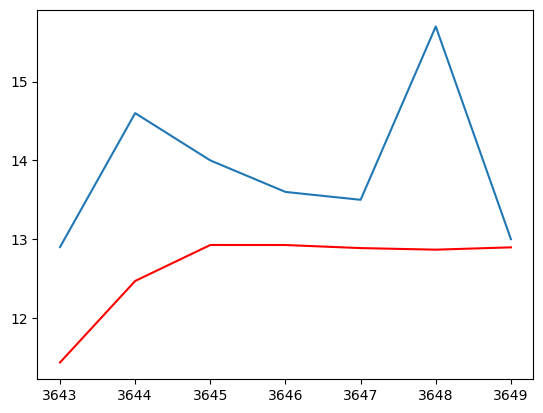

In [19]:
import matplotlib.pyplot as plt

plt.plot(pred,c='r')
plt.plot(test['Temp'])

# Walk Forward Validation

In [32]:
import numpy as np

In [33]:
df = pd.read_csv('daily-min-temperatures.csv', header = 0, parse_dates=[0])

In [34]:
train, test = df['Temp'].iloc[:len(df)-7], df['Temp'].iloc[len(df)-7:]

In [35]:
train

0       20.7
1       17.9
2       18.8
3       14.6
4       15.8
        ... 
3638    15.4
3639    13.1
3640    13.2
3641    13.9
3642    10.0
Name: Temp, Length: 3643, dtype: float64

In [48]:
data = train
predictions = []

for t in train:
    if len(data)<=len(train)+len(test)-1:
        model = AutoReg(data, lags = lag_list).fit()
        pred = model.predict(start = len(data), end = len(train)+len(test)-1)
        print(pred.values[0])
        predictions.append(pred.values[0])
        data = np.append(data, t)
        data = pd.Series(data)
    else:
        break

11.435350111011703
18.036240555075178
15.408434700248431
16.527039237629772
14.1153526398735
15.48902304777633
15.340061651658903


In [61]:
data = pd.Series(train)
predicts = []

for t in test:
    model = AutoReg(data, lags = lag_list).fit()
    pred = model.predict(start = len(data), end = len(train)+len(test)-1)
    print(pred.values[0])
    predicts.append(pred.values[0])
    data = np.append(data, t)
    data = pd.Series(data)

11.435350111011703
13.351940991123461
14.0845210911143
13.475718168035453
13.387993286468085
13.402644828948207
14.787667389638466


In [62]:
test

3643    12.9
3644    14.6
3645    14.0
3646    13.6
3647    13.5
3648    15.7
3649    13.0
Name: Temp, dtype: float64

In [49]:
test.values

array([12.9, 14.6, 14. , 13.6, 13.5, 15.7, 13. ])

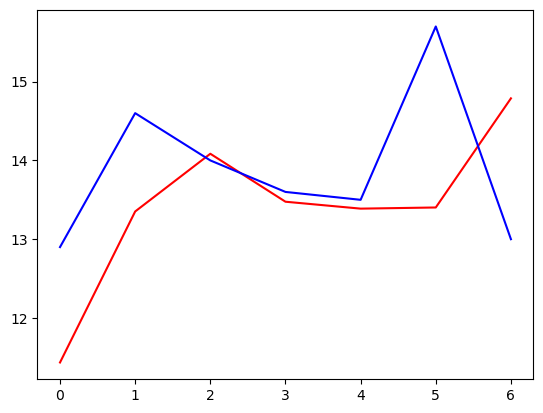

In [63]:
plt.plot(predicts, c = 'r')
plt.plot(test.values, c = 'b')

In [65]:
mean_squared_error(predictions, test.values)

4.343322018925492

In [66]:
mean_squared_error(predicts, test.values)

1.7445116224803392